Epoch 1/9
16/16 [==============================] - 2s 81ms/step - loss: 2.7735 - accuracy: 0.4038 - val_loss: 1.9033 - val_accuracy: 0.6040
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.5934 - accuracy: 0.6714 - val_loss: 1.4008 - val_accuracy: 0.6770
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.1937 - accuracy: 0.7459 - val_loss: 1.1900 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 1s 48ms/step - loss: 0.9671 - accuracy: 0.7913 - val_loss: 1.0625 - val_accuracy: 0.7660
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.7981 - accuracy: 0.8276 - val_loss: 0.9859 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6640 - accuracy: 0.8599 - val_loss: 0.9305 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5533 - accuracy: 0.8825 - val_loss: 0.8980 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

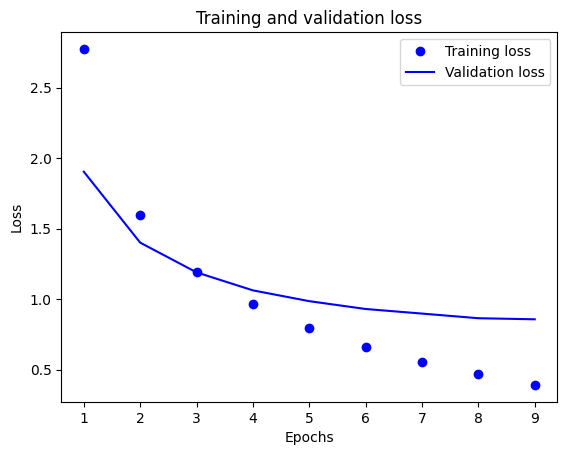

In [8]:
# we will work with retuers dataset, a set of short newswires and their topics
# There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

import numpy as np
import keras

from keras.datasets import reuters
from keras.utils import to_categorical
from keras import layers
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
            num_words=10000)

# prepare data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# prepare labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# define model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# compile model
model.compile(optimizer="rmsprop",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

# separate training data from validation data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# train
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print(results) # [0.9170345664024353, 0.7880676984786987], around ~80% accuracy

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
